In [1]:
import pandas as pd
import os

In [2]:
os.getcwd()

'/Users/Sarah/Desktop/Python programming folder'

In [66]:
movies = pd.read_csv('P4-Movie-Ratings.csv')

In [4]:
len(movies)

559

In [5]:
movies.head()

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [67]:
movies.columns = ['Film', 'Genre', 'CriticRating', 'AudienceRating', 'BudgetMillions', 'Year']

In [7]:
movies.head()

,Film,Genre,CriticRating,AudienceRating,BudgetMillions,Year
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [8]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Film            559 non-null    object
 1   Genre           559 non-null    object
 2   CriticRating    559 non-null    int64 
 3   AudienceRating  559 non-null    int64 
 4   BudgetMillions  559 non-null    int64 
 5   Year            559 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 26.3+ KB


In [9]:
movies.describe()

,CriticRating,AudienceRating,BudgetMillions,Year
count,559.000000,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136,2009.152057
std,26.413091,16.826887,48.731817,1.362632
min,0.000000,0.000000,0.000000,2007.000000
25%,25.000000,47.000000,20.000000,2008.000000
50%,46.000000,58.000000,35.000000,2009.000000
75%,70.000000,72.000000,65.000000,2010.000000
max,97.000000,96.000000,300.000000,2011.000000


In [4]:
movies.Film = movies.Film.astype('category')

In [12]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Film            559 non-null    category
 1   Genre           559 non-null    object  
 2   CriticRating    559 non-null    int64   
 3   AudienceRating  559 non-null    int64   
 4   BudgetMillions  559 non-null    int64   
 5   Year            559 non-null    int64   
dtypes: category(1), int64(4), object(1)
memory usage: 43.6+ KB


In [73]:
movies.Genre = movies.Genre.astype('category')
movies.Year = movies.Year.astype('category')

In [14]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Film            559 non-null    category
 1   Genre           559 non-null    category
 2   CriticRating    559 non-null    int64   
 3   AudienceRating  559 non-null    int64   
 4   BudgetMillions  559 non-null    int64   
 5   Year            559 non-null    category
dtypes: category(3), int64(3)
memory usage: 36.5 KB


In [15]:
movies.Genre.cat.categories

Index(['Action', 'Adventure', 'Comedy', 'Drama', 'Horror', 'Romance',
       'Thriller'],
      dtype='object')

In [16]:
movies.describe()

,CriticRating,AudienceRating,BudgetMillions
count,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136
std,26.413091,16.826887,48.731817
min,0.000000,0.000000,0.000000
25%,25.000000,47.000000,20.000000
50%,46.000000,58.000000,35.000000
75%,70.000000,72.000000,65.000000
max,97.000000,96.000000,300.000000


In [6]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

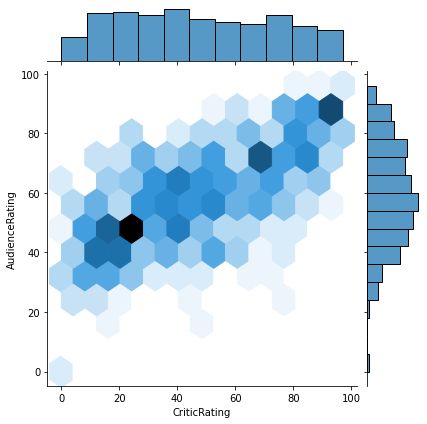

In [21]:
#JointPlots
j = sns.jointplot(data=movies, x='CriticRating', y='AudienceRating', kind = 'hex')

In [22]:
#Chart 1
#Histograms

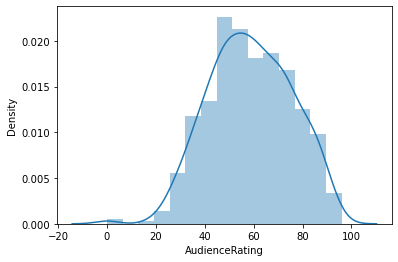

In [23]:
#first method
m1 = sns.distplot(movies.AudienceRating, bins = 15)

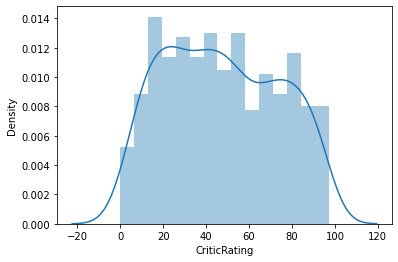

In [24]:
m2 = sns.distplot(movies.CriticRating, bins = 15)

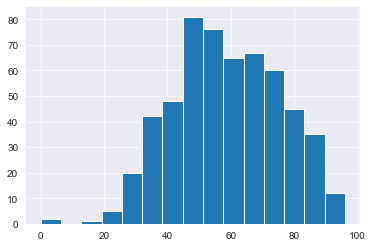

In [28]:
sns.set_style("darkgrid")
#Chart2
n1 = plt.hist(movies.AudienceRating, bins= 15)

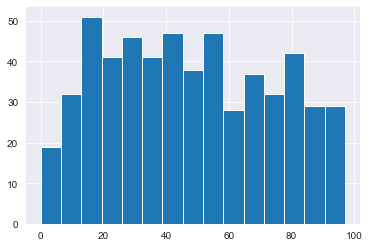

In [30]:
#Chart3
n2 = plt.hist(movies.CriticRating, bins = 15)

In [31]:
#Stacked Histograms

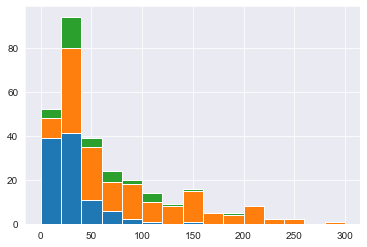

In [36]:
h1=plt.hist([movies[movies.Genre =='Drama'].BudgetMillions,movies[movies.Genre =='Action'].BudgetMillions,movies[movies.Genre =='Thriller'].BudgetMillions], bins = 15, stacked= True)
plt.show()

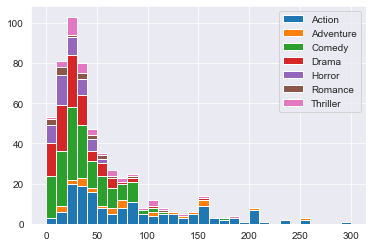

In [40]:
list1 = list()
mylabels = list()
for gen in movies.Genre.cat.categories:
    list1.append(movies[movies.Genre ==gen].BudgetMillions)
    mylabels.append(gen)
h=plt.hist(list1, bins=30, stacked=True, rwidth=1, label=mylabels)
plt.legend()
plt.show()

In [41]:
#Chart 4
#KDE Plot

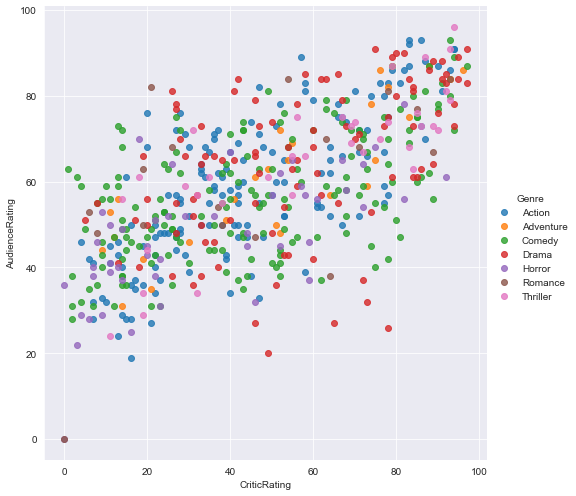

In [42]:
vis1 = sns.lmplot(data=movies, x='CriticRating', y='AudienceRating', fit_reg=False, hue = 'Genre', size = 7, aspect = 1)

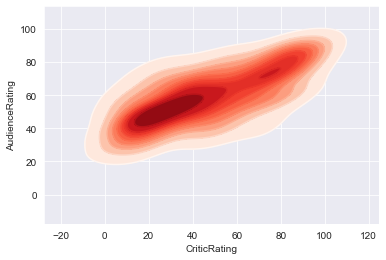

In [47]:
k1 = sns.kdeplot(movies.CriticRating, movies.AudienceRating, shade=True, shade_lowest = False, cmap='Reds')
#Tip run with just outlines to overlay them
k1b = sns.kdeplot(movies.CriticRating, movies.AudienceRating, cmap='Reds')

In [7]:
#Working with subplots()

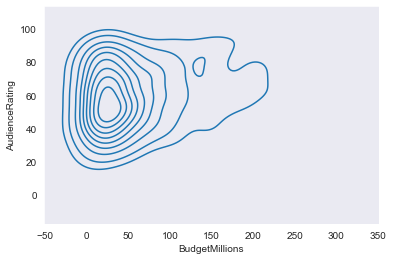

In [9]:
sns.set_style('dark')
k1= sns.kdeplot(movies.BudgetMillions, movies.AudienceRating)

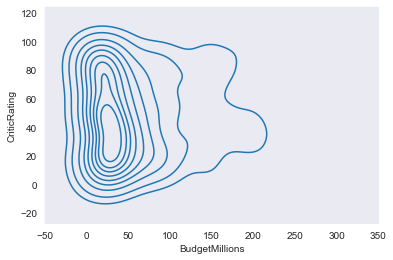

In [10]:
k1= sns.kdeplot(movies.BudgetMillions, movies.CriticRating)

[(-30.0, 220.0)]

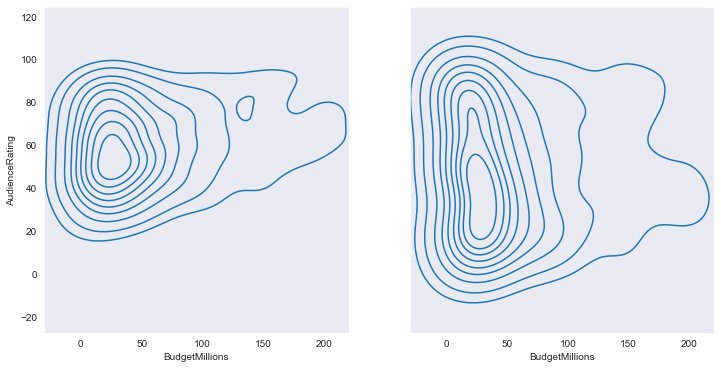

In [17]:
f, axes = plt.subplots(1,2, figsize=(12,6), sharex=True, sharey=True)
k1= sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, ax=axes[0])
k2= sns.kdeplot(movies.BudgetMillions, movies.CriticRating, ax=axes[1])
k1.set(xlim=(-30,220))

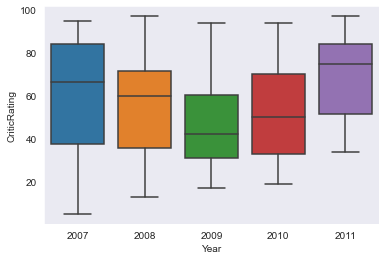

In [22]:
#ViolinPlots
w = sns.boxplot(data = movies[movies.Genre=='Drama'], x= 'Year', y = 'CriticRating')

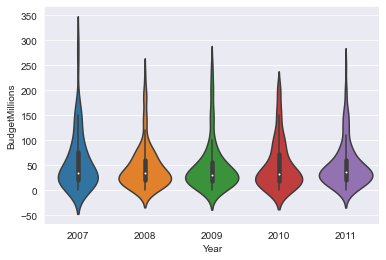

In [56]:
z = sns.violinplot(data = movies, x= 'Year', y = 'BudgetMillions')

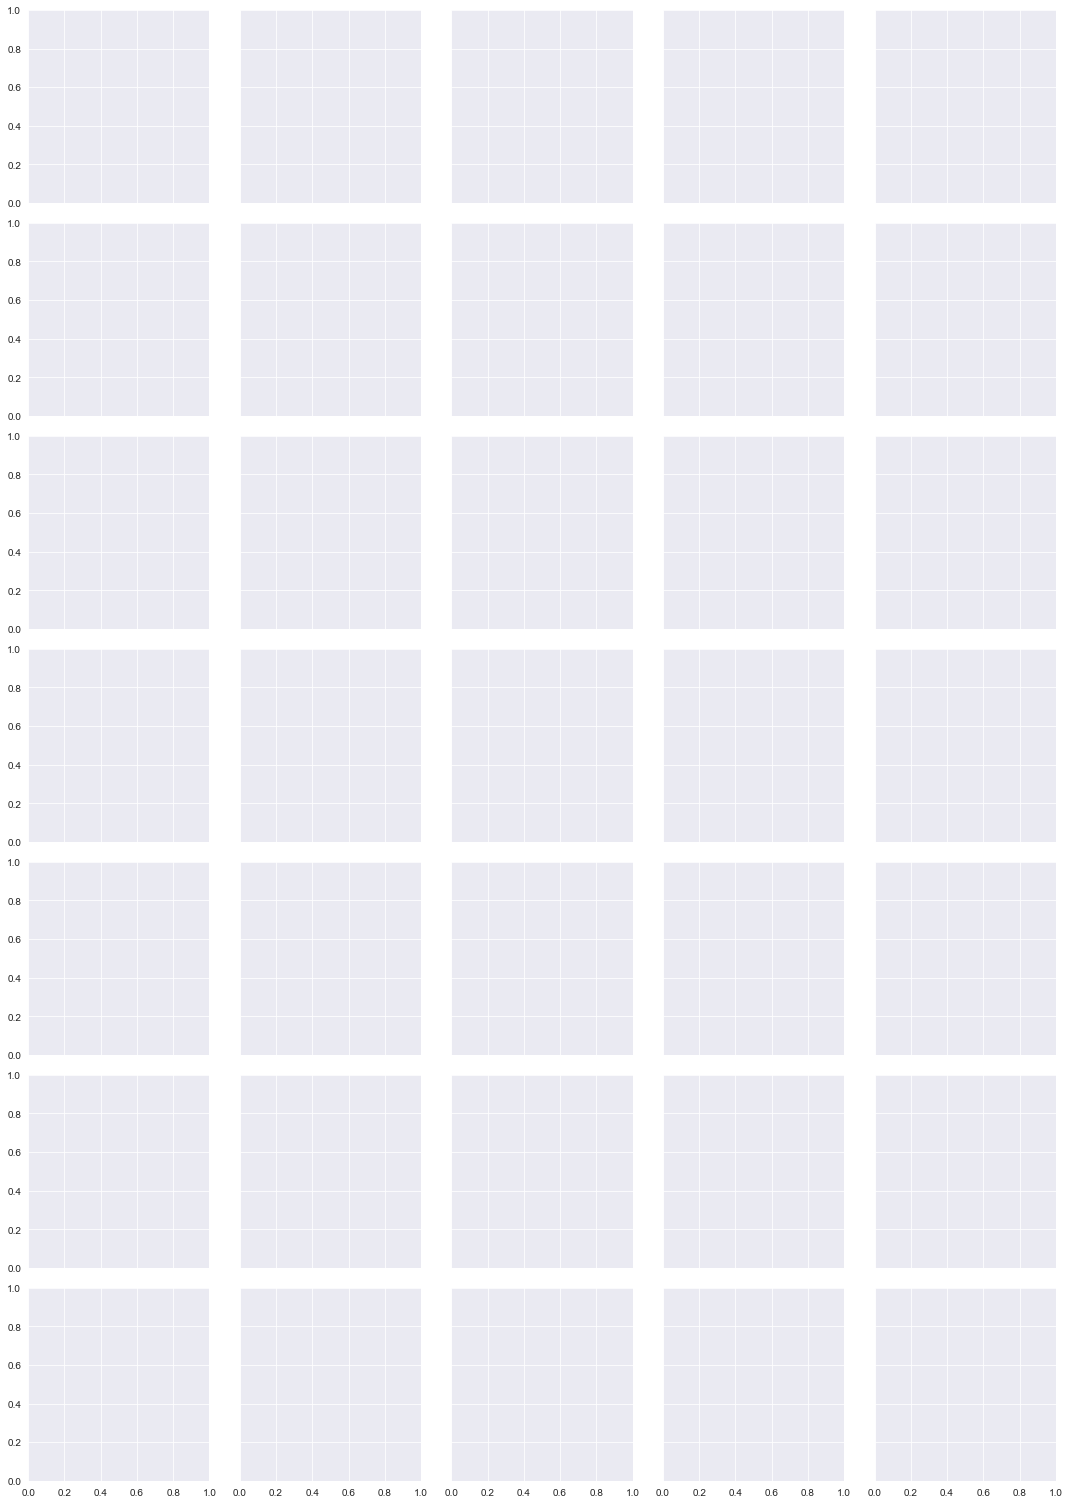

In [57]:
#Creating a facet grid
g = sns.FacetGrid(movies, row = 'Genre', col = 'Year', hue='Genre')

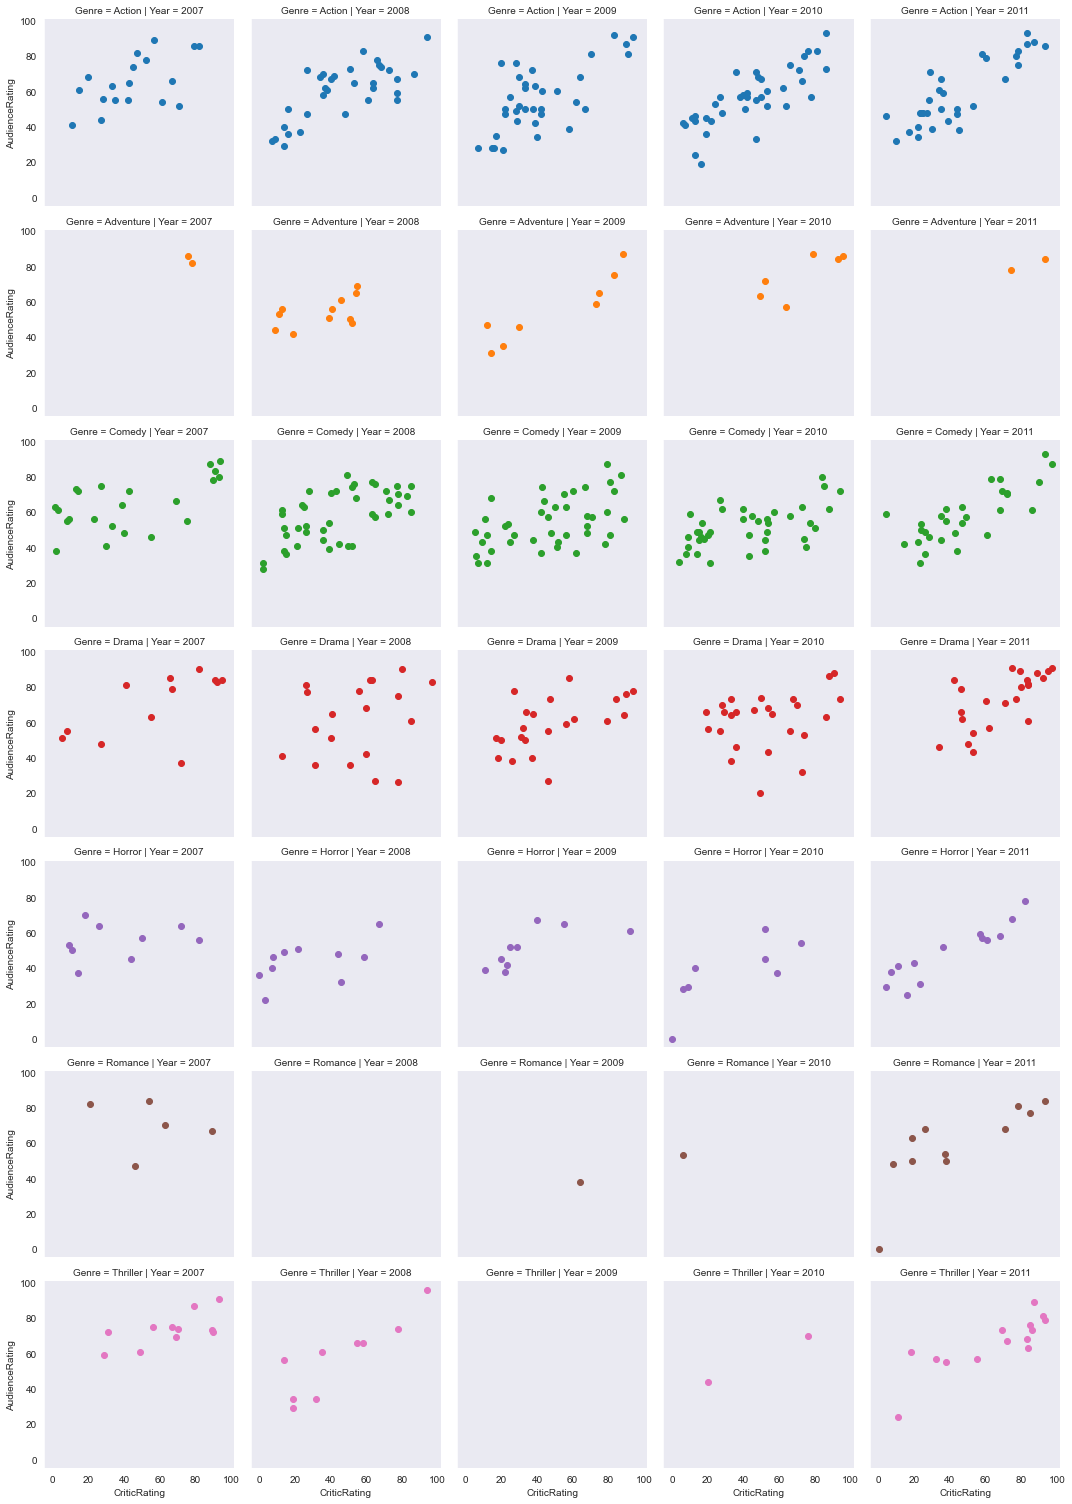

In [29]:
g = sns.FacetGrid(movies, row = 'Genre', col = 'Year', hue='Genre')
g = g.map(plt.scatter, 'CriticRating', 'AudienceRating')

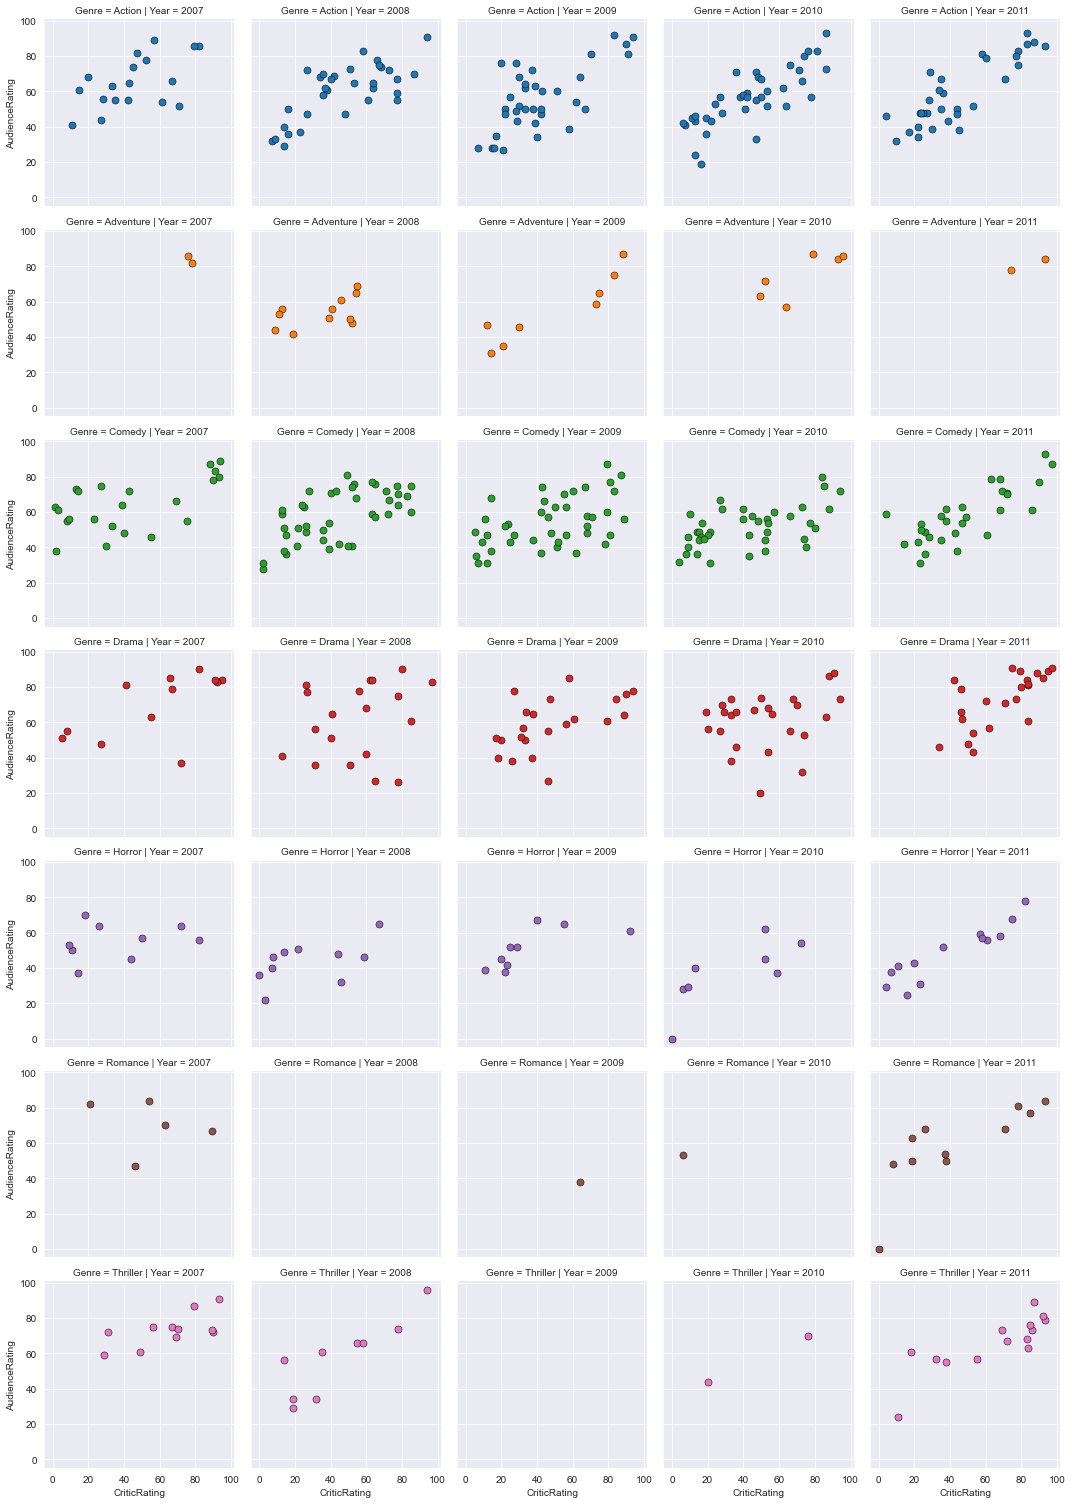

In [58]:
#back to the scatterplots
g = sns.FacetGrid(movies, row = 'Genre', col = 'Year', hue='Genre')
kws=dict(s=50, linewidth=0.5, edgecolor='black')
g = g.map(plt.scatter, 'CriticRating', 'AudienceRating',**kws)

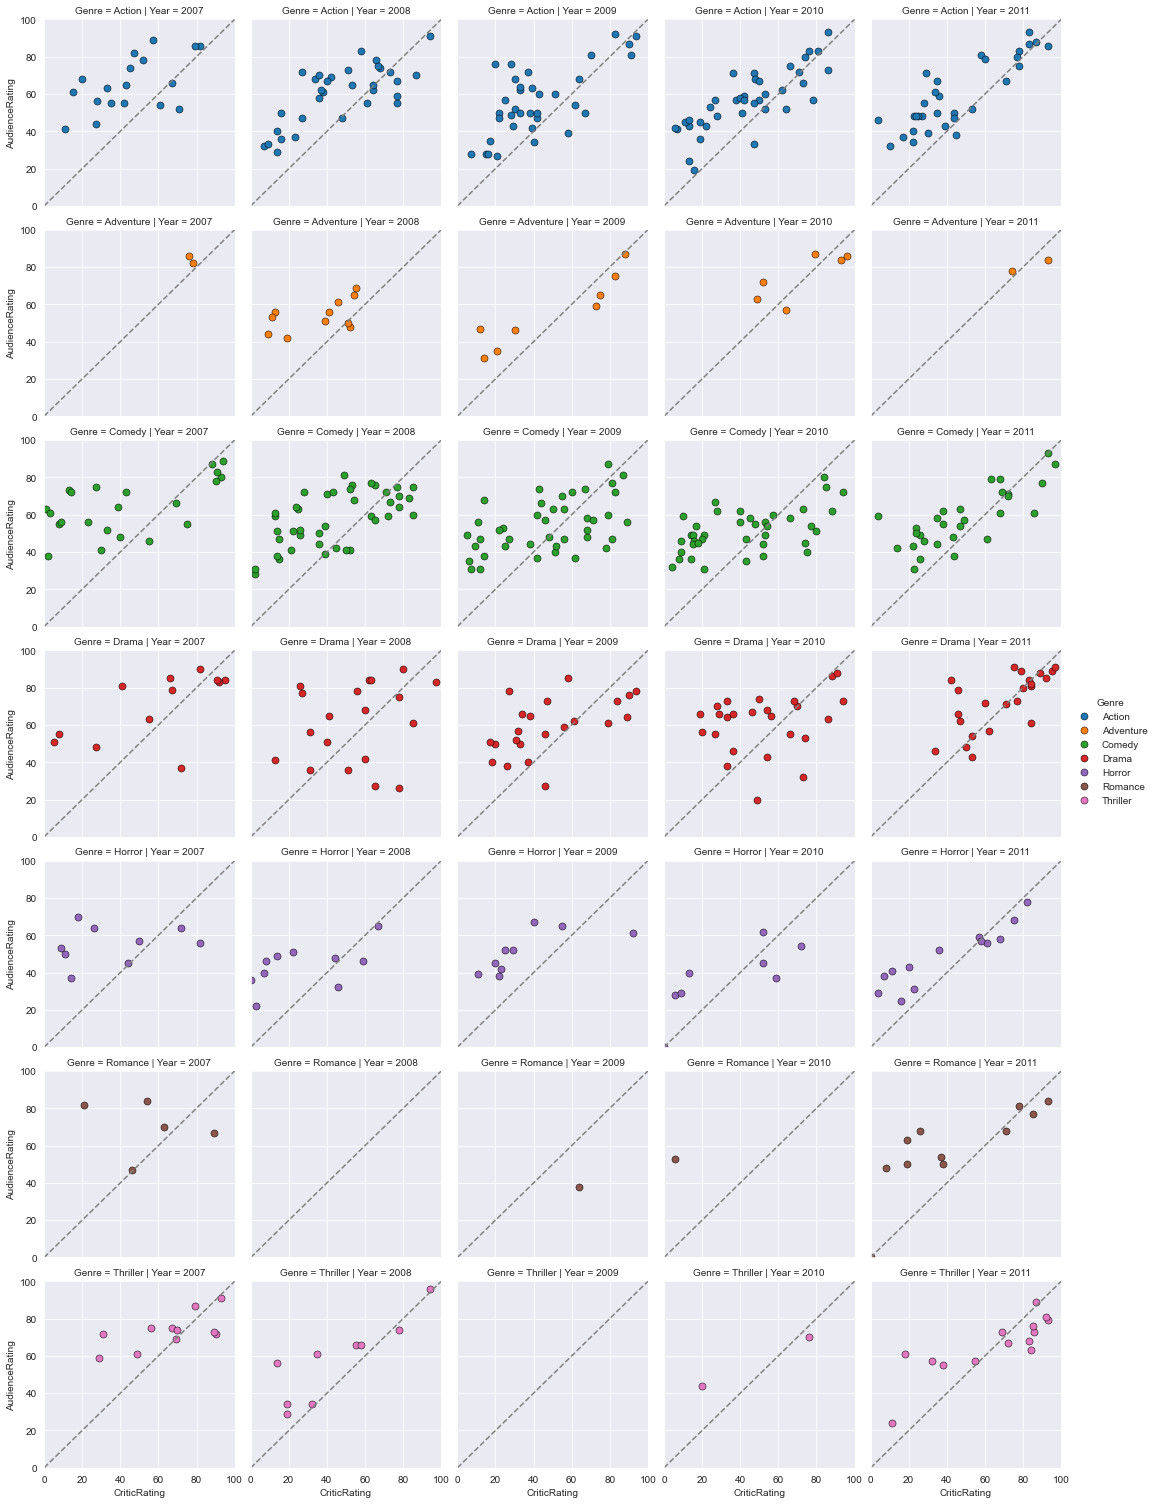

In [59]:
#Chart 5
#Controlling axes and adding diagonals
g = sns.FacetGrid(movies, row = 'Genre', col = 'Year', hue='Genre')
kws=dict(s=50, linewidth=0.5, edgecolor='black')
g = g.map(plt.scatter, 'CriticRating', 'AudienceRating', **kws)
g.set(xlim=(0,100), ylim=(0,100))
for ax in g.axes.flat:
    ax.plot((0,100), (0,100), c='gray', ls='--')
g.add_legend()

In [35]:
#Building Dashboards - must all be seaborn plots for this to work

In [60]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

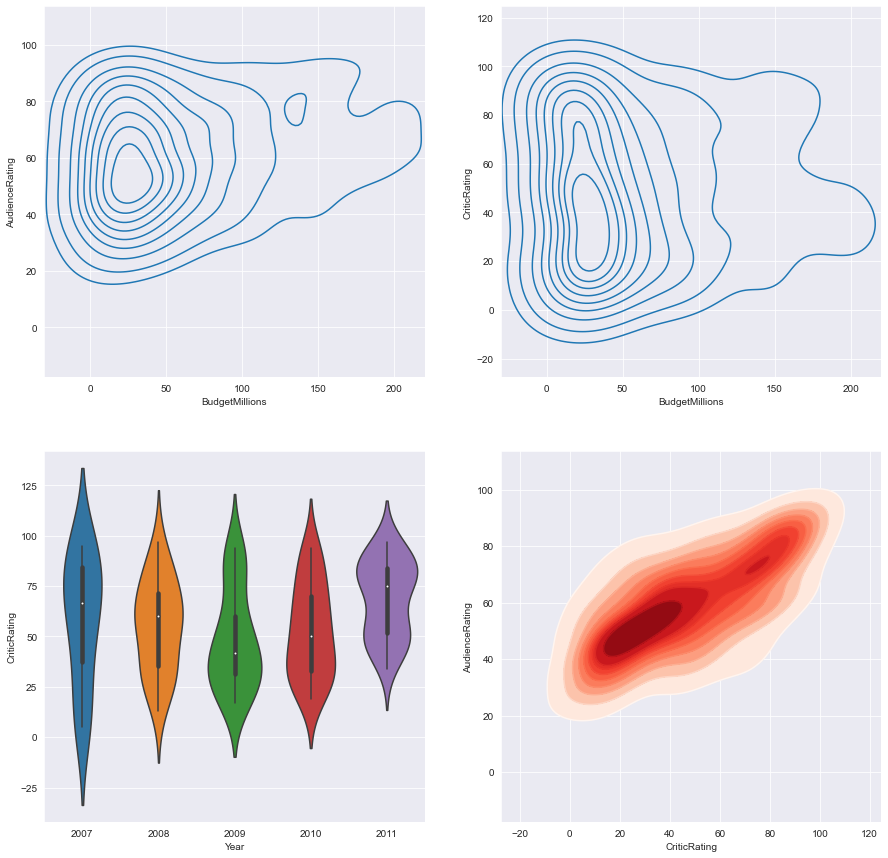

In [61]:
sns.set_style('darkgrid')
f, axes = plt.subplots(2,2, figsize=(15,15))
k1= sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, ax=axes[0,0])
k2= sns.kdeplot(movies.BudgetMillions, movies.CriticRating, ax=axes[0,1])
z = sns.violinplot(data = movies[movies.Genre=='Drama'], x= 'Year', y = 'CriticRating', ax=axes[1,0])
k4 = sns.kdeplot(movies.CriticRating, movies.AudienceRating, shade=True, shade_lowest = False, cmap='Reds', ax=axes[1,1])
#Tip run with just outlines to overlay them
k1b = sns.kdeplot(movies.CriticRating, movies.AudienceRating, cmap='Reds',ax=axes[1,1])
k1.set(xlim=(-30,220))
k2.set(xlim=(-30,220))
plt.show()

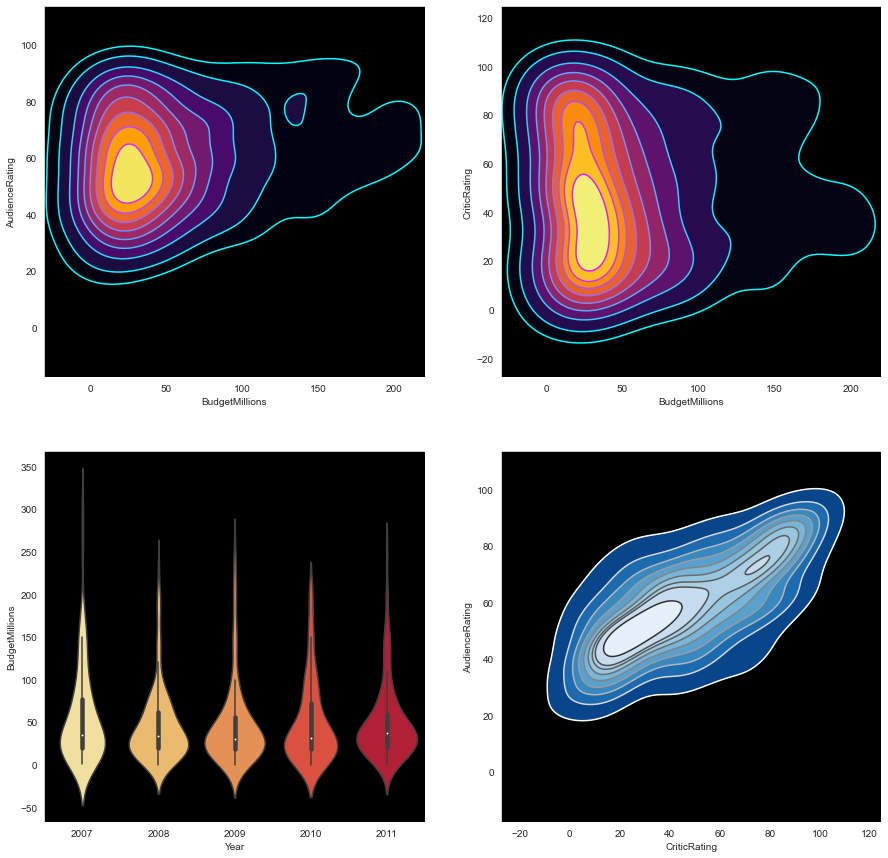

In [70]:
#styling dashboards
sns.set_style('dark', {"axes.facecolor": "black"})
f, axes = plt.subplots(2,2, figsize=(15,15))
#plot [0,0]
k1= sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, shade= True, shade_lowest=False, cmap='inferno', ax=axes[0,0])
k1b = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, cmap='cool',ax=axes[0,0])
#plot [0,1]
k2= sns.kdeplot(movies.BudgetMillions, movies.CriticRating,shade= True, shade_lowest=False, cmap='inferno', ax=axes[0,1])
k2b =sns.kdeplot(movies.BudgetMillions, movies.CriticRating, cmap='cool',ax=axes[0,1])
#plot [1,0]
z = sns.violinplot(data=movies, x='Year', y ='BudgetMillions', ax=axes[1,0], palette='YlOrRd')
#plot [1,1]
k4 = sns.kdeplot(movies.CriticRating, movies.AudienceRating, shade=True, shade_lowest = False, cmap='Blues_r', ax=axes[1,1])
k4b = sns.kdeplot(movies.CriticRating, movies.AudienceRating, cmap='gist_gray_r',ax=axes[1,1])
k1.set(xlim=(-30,220))
k2.set(xlim=(-30,220))
plt.show()

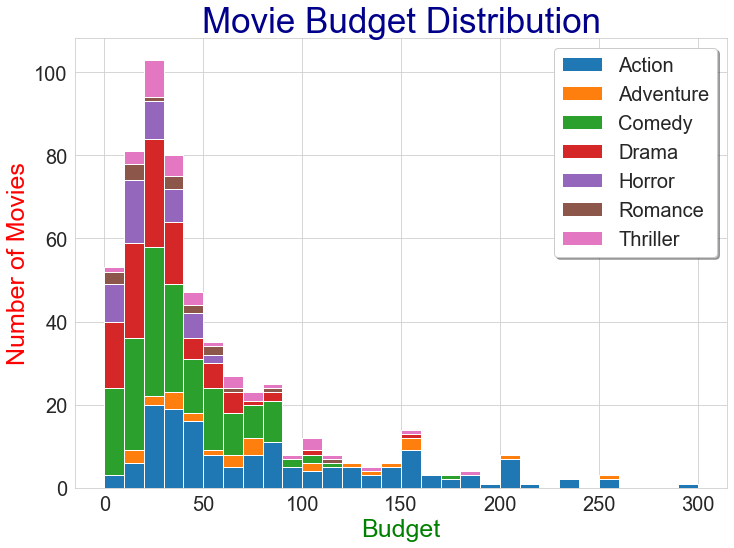

In [84]:
#Thematic Edits
list1 = list()
mylabels = list()
for gen in movies.Genre.cat.categories:
    list1.append(movies[movies.Genre ==gen].BudgetMillions)
    mylabels.append(gen)
sns.set_style("whitegrid")
fig, ax=plt.subplots() #create an empty subplot in order to edit the size easier
fig.set_size_inches(11.7,8.27)
h=plt.hist(list1, bins=30, stacked=True, rwidth=1, label=mylabels)
plt.title("Movie Budget Distribution", fontsize=35, color='DarkBlue', fontname="Arial")
plt.ylabel("Number of Movies", fontsize=25, color='Red')
plt.xlabel("Budget", fontsize=25, color='Green')
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.legend(frameon = True, fancybox = True, shadow = True, framealpha=1, prop={'size': 20})
plt.show()